In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
colors = sns.color_palette()
#from rhessys import utilities as rut
import statsmodels.formula.api as sm
from matplotlib.patches import Polygon

In [3]:
niwot = pd.read_pickle('./data/niwot_stats.pcl')

In [4]:
niwot

,averageMR,peakSWE,DatepeakSWE,DateNS,accumSeasDate,P,DOWYpeakSWE,DOWYnoSnow,DOAS
1981,10.53333,0.193,1981-04-09 00:00:00,1981-05-09 00:00:00,1980-10-17 00:00:00,674,191,221,17
1982,11.20833,0.384,1982-04-13 00:00:00,1982-06-11 00:00:00,1981-10-27 00:00:00,969,195,254,27
1983,14.86667,0.465,1983-05-21 00:00:00,1983-06-24 00:00:00,1982-10-14 00:00:00,967,233,267,14
1984,20.66667,0.536,1984-05-06 00:00:00,1984-06-02 00:00:00,1983-11-08 00:00:00,1006,219,246,39
1985,10.08571,0.277,1985-04-05 00:00:00,1985-05-23 00:00:00,1984-10-17 00:00:00,818,187,235,17
1986,12.14894,0.427,1986-04-14 00:00:00,1986-06-04 00:00:00,1985-10-01 00:00:00,925,196,247,1
1987,9.173913,0.302,1987-04-14 00:00:00,1987-05-18 00:00:00,1986-10-04 00:00:00,849,196,230,4
1988,9.978723,0.356,1988-03-31 00:00:00,1988-05-27 00:00:00,1987-11-07 00:00:00,784,183,240,38
1989,10,0.274,1989-04-13 00:00:00,1989-05-21 00:00:00,1988-11-04 00:00:00,802,195,233,35
1990,11.13636,0.389,1990-04-06 00:00:00,1990-06-04 00:00:00,1989-11-01 00:00:00,913,188,247,32


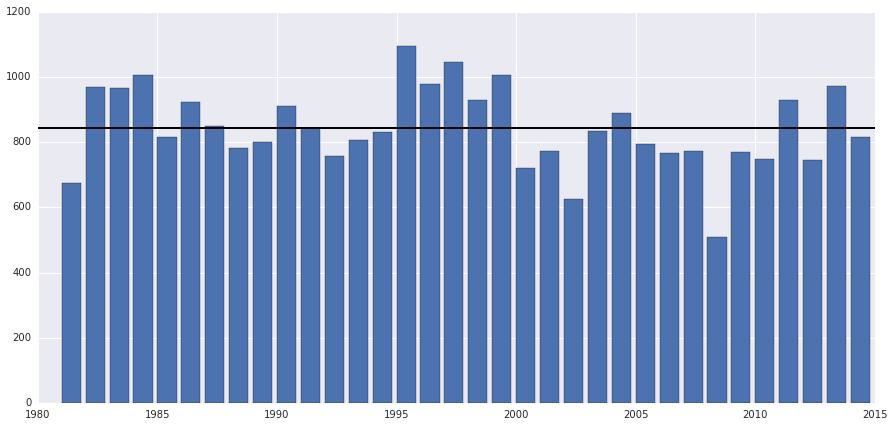

In [5]:
plt.figure(figsize=(15,7))
plt.bar(niwot.index,niwot.P)
plt.axhline(niwot.P.mean(),c='k',lw=2)

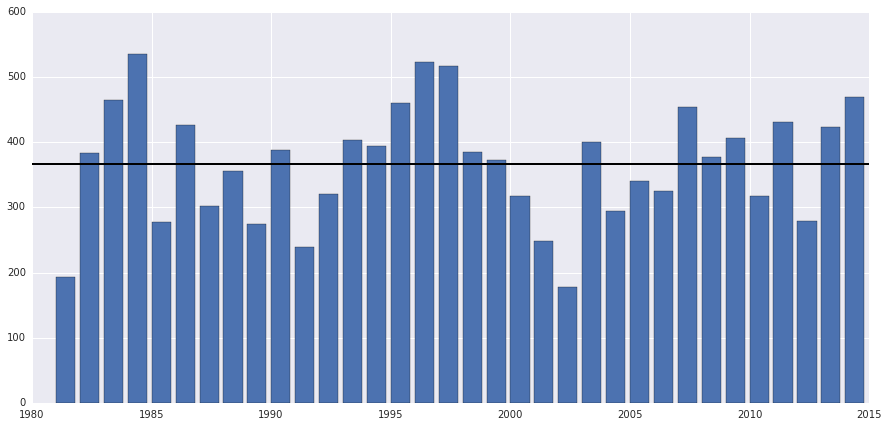

In [6]:
plt.figure(figsize=(15,7))
plt.bar(niwot.index,niwot.peakSWE*1000)
plt.axhline(niwot.peakSWE.mean()*1000,c='k',lw=2)

## WY 2008 is a good average snow year

In [7]:
peakswe = niwot.peakSWE.mean()
DOAS = niwot.DOAS.mean()
DONS = niwot.DOWYnoSnow.mean()
DOWYpeakSWE = niwot.DOWYpeakSWE.mean()

peakswe90 = np.percentile(niwot.peakSWE,90)
DOAS90 = np.percentile(niwot.DOAS,90)
DONS90 = np.percentile(niwot.DOWYnoSnow,90)
DOWYpeakSWE90 = np.percentile(niwot.DOWYpeakSWE,90)

peakswe10 = np.percentile(niwot.peakSWE,10)
DOAS10 = np.percentile(niwot.DOAS,10)
DONS10 = np.percentile(niwot.DOWYnoSnow,10)
DOWYpeakSWE10 = np.percentile(niwot.DOWYpeakSWE,10)

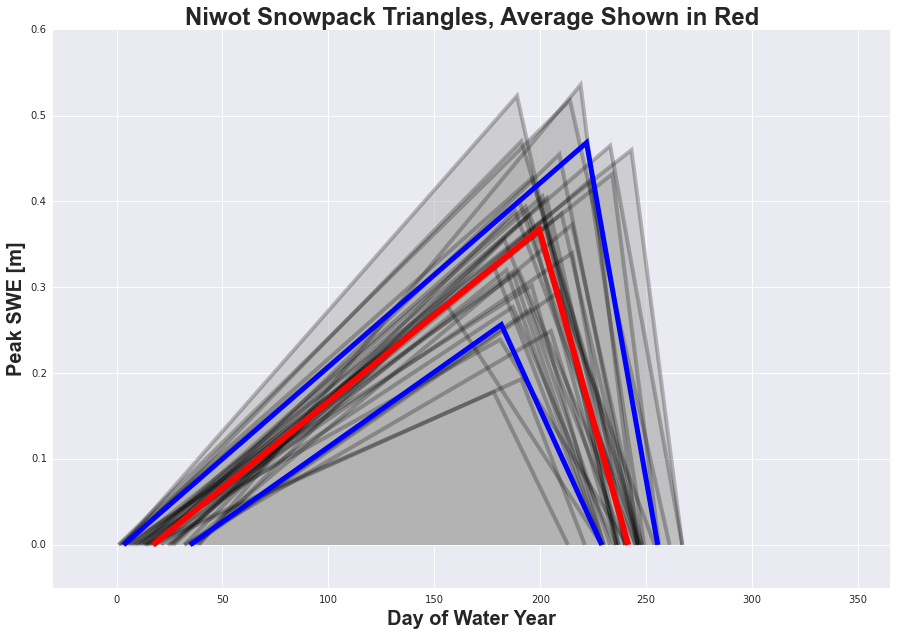

In [8]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

for wy in np.unique(niwot.index):
    
    x1 = niwot.loc[niwot.index==wy,'DOAS'].as_matrix()[0]
    x2 = niwot.loc[niwot.index==wy,'DOWYnoSnow'].as_matrix()[0]
    x3 = niwot.loc[niwot.index==wy,'DOWYpeakSWE'].as_matrix()[0]
    y3 = niwot.loc[niwot.index==wy,'peakSWE'].as_matrix()[0]
    
    pts = np.array([[x2,0],[x3,y3],[x1,0]])
    
    p = Polygon(pts, closed=False, alpha = 0.5,edgecolor='none',facecolor='0.7')
    ax.add_patch(p)
    
for wy in np.unique(niwot.index):
    
    x1 = niwot.loc[niwot.index==wy,'DOAS'].as_matrix()[0]
    x2 = niwot.loc[niwot.index==wy,'DOWYnoSnow'].as_matrix()[0]
    x3 = niwot.loc[niwot.index==wy,'DOWYpeakSWE'].as_matrix()[0]
    y3 = niwot.loc[niwot.index==wy,'peakSWE'].as_matrix()[0]
    
    pts = np.array([[x2,0],[x3,y3],[x1,0]])
    
    p = Polygon(pts, closed=False, alpha = 0.25,edgecolor='k',facecolor='none',lw=4)
    ax.add_patch(p)

x1 = DOAS
x2 = DONS
x3 = DOWYpeakSWE
y3 = peakswe

pts = np.array([[x2,0],[x3,y3],[x1,0]])
    
p = Polygon(pts, closed=False, alpha = 1,edgecolor='r',facecolor='none',lw=6)
ax.add_patch(p)

x1 = DOAS10
x2 = DONS90
x3 = DOWYpeakSWE90
y3 = peakswe90

pts = np.array([[x2,0],[x3,y3],[x1,0]])
    
p = Polygon(pts, closed=False, alpha = 1,edgecolor='b',facecolor='none',lw=5)
ax.add_patch(p)

x1 = DOAS90
x2 = DONS10
x3 = DOWYpeakSWE10
y3 = peakswe10

pts = np.array([[x2,0],[x3,y3],[x1,0]])
    
p = Polygon(pts, closed=False, alpha = 1,edgecolor='b',facecolor='none',lw=5)
ax.add_patch(p)

ax.set_xlim(-30,365)
ax.set_ylim(-0.05,0.6)

plt.ylabel('Peak SWE [m]', fontsize=20, weight='bold')
plt.xlabel('Day of Water Year', fontsize=20, weight='bold')
plt.title('Niwot Snowpack Triangles, Average Shown in Red', fontsize=24, weight='bold')
plt.savefig('./figures/niwot_triangles.png', bbox_inches='tight',dpi=300)

## Map the Parameter Space on the Triangle

In [9]:
params = pd.read_hdf('./data/smex2.hdf','df')

In [10]:
PS_min = params.peakSWE.min()
PS_max = params.peakSWE.max()

DONS_min = params.Tnosnow.min()
DONS_max = params.Tnosnow.max()

tPS_min = params.TpeakSWE.min()
tPS_max = params.TpeakSWE.max()

x1 = 15

#pts = np.array([[x1,0],[tPS_min,PS_min],[tPS_max,PS_min],[DONS_min,0],[DONS_max,0],[tPS_max,PS_max],[tPS_min,PS_max]])

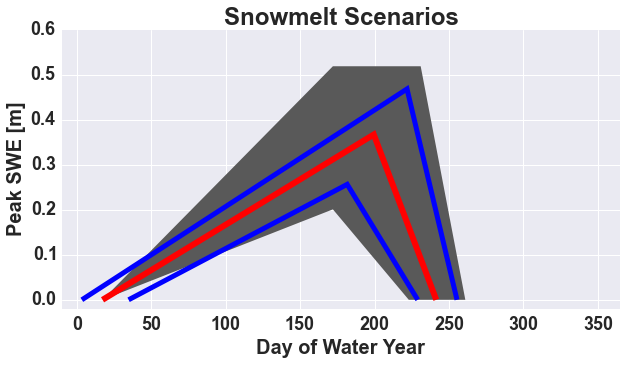

In [14]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

pts = np.array([[x1,0],[tPS_min,PS_min],[DONS_min,0],[DONS_max,0],[tPS_max,PS_max],[tPS_min,PS_max]])
p = Polygon(pts, closed=True, alpha = 1,edgecolor='none',facecolor='0.35')
ax.add_patch(p)

x1 = DOAS10
x2 = DONS90
x3 = DOWYpeakSWE90
y3 = peakswe90

pts = np.array([[x2,0],[x3,y3],[x1,0]])
    
p = Polygon(pts, closed=False, alpha = 1,edgecolor='b',facecolor='none',lw=5)
ax.add_patch(p)

x1 = DOAS90
x2 = DONS10
x3 = DOWYpeakSWE10
y3 = peakswe10

pts = np.array([[x2,0],[x3,y3],[x1,0]])
    
p = Polygon(pts, closed=False, alpha = 1,edgecolor='b',facecolor='none',lw=5)
ax.add_patch(p)

x1 = DOAS
x2 = DONS
x3 = DOWYpeakSWE
y3 = peakswe

pts = np.array([[x2,0],[x3,y3],[x1,0]])
    
p = Polygon(pts, closed=False, alpha = 1,edgecolor='r',facecolor='none',lw=6)
ax.add_patch(p)

plt.ylabel('Peak SWE [m]', fontsize=20, weight='bold')
plt.xlabel('Day of Water Year', fontsize=20, weight='bold')
plt.title('Snowmelt Scenarios', fontsize=24, weight='bold')
plt.setp(ax.get_xticklabels(), fontsize=18, fontweight = 'bold');
plt.setp(ax.get_yticklabels(), fontsize=18, fontweight = 'bold');
ax.set_xlim(-10,365)
ax.set_ylim(-0.02,0.6);
plt.savefig('./figures/niwot_triangles.png', bbox_inches='tight',dpi=300)

In [51]:
niwot.DOWYpeakSWE[0:5]

Series([], Name: DOWYpeakSWE, dtype: int64)

In [37]:
DOWYpeakSWE

199.47058823529412

In [40]:
int(DOWYpeakSWE10)

181

In [52]:
# Day of Water Year Peak SWE
print int(DOWYpeakSWE)-((int(DOWYpeakSWE)-int(DOWYpeakSWE10))*1.5)
print int(DOWYpeakSWE)+((int(DOWYpeakSWE90)-int(DOWYpeakSWE))*1.5)

172.0
232.0


In [55]:
# Peak SWE
print (peakswe-((peakswe-peakswe10)*1.5))*1000
print (peakswe+((peakswe90-peakswe)*1.5))*1000

0.201102941176
0.519102941176


In [56]:
# Date of water year of No Snow
print int(DONS)-((int(DONS)-int(DONS10))*1.5)
print int(DONS)+((int(DONS90)-int(DONS))*1.5)

223.0
262.0
